In [ ]:
import os

os.listdir('/content/')


['.config', 'modelo.pkl', 'teste_indicium_precificacao.csv', 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv('/content/teste_indicium_precificacao.csv')

df.head()


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:

print(f"Formato do dataset: {df.shape}")

df.info()


df.describe()

df.isnull().sum()


Formato do dataset: (48894, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review 

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df['nome'].fillna("Sem Nome", inplace=True)
df['host_name'].fillna("Desconhecido", inplace=True)
df['ultima_review'].fillna("Sem avaliação", inplace=True)

df['reviews_por_mes'].fillna(0, inplace=True)

print(df.isnull().sum())


id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


<ipython-input-49-a4b0a35c016f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nome'].fillna("Sem Nome", inplace=True)
<ipython-input-49-a4b0a35c016f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

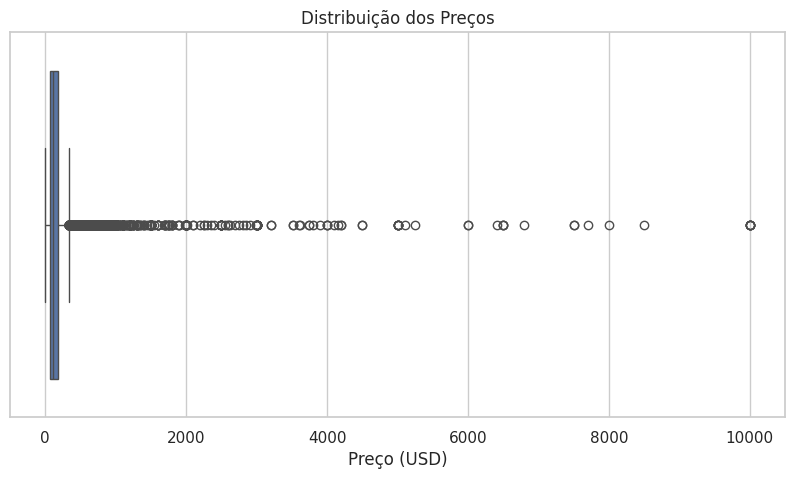

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))


sns.boxplot(x=df['price'])

plt.title("Distribuição dos Preços")
plt.xlabel("Preço (USD)")
plt.show()


<ipython-input-51-bade4fe67ffe>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['room_type'], y=df['price'], estimator=lambda x: x.mean(), ci=None)


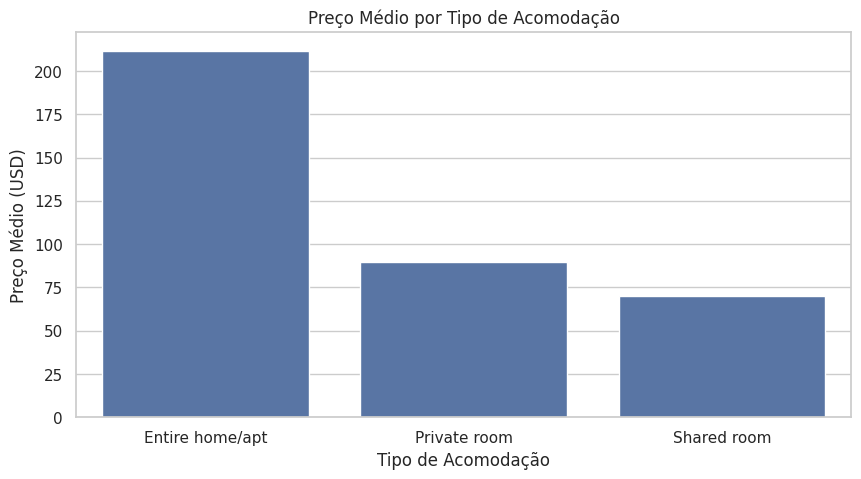

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['room_type'], y=df['price'], estimator=lambda x: x.mean(), ci=None)

plt.title("Preço Médio por Tipo de Acomodação")
plt.ylabel("Preço Médio (USD)")
plt.xlabel("Tipo de Acomodação")
plt.show()


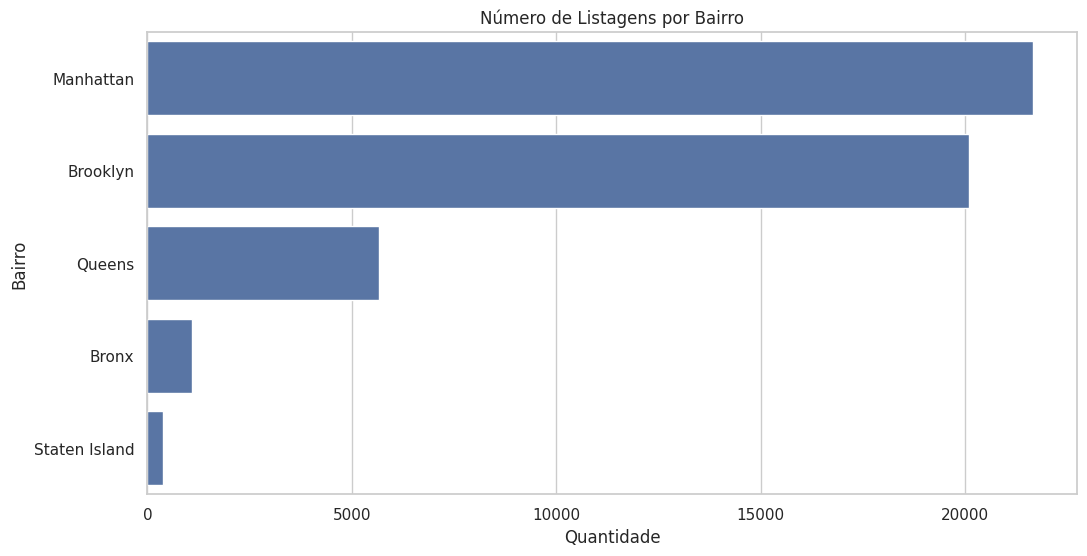

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['bairro_group'], order=df['bairro_group'].value_counts().index)

plt.title("Número de Listagens por Bairro")
plt.xlabel("Quantidade")
plt.ylabel("Bairro")
plt.show()


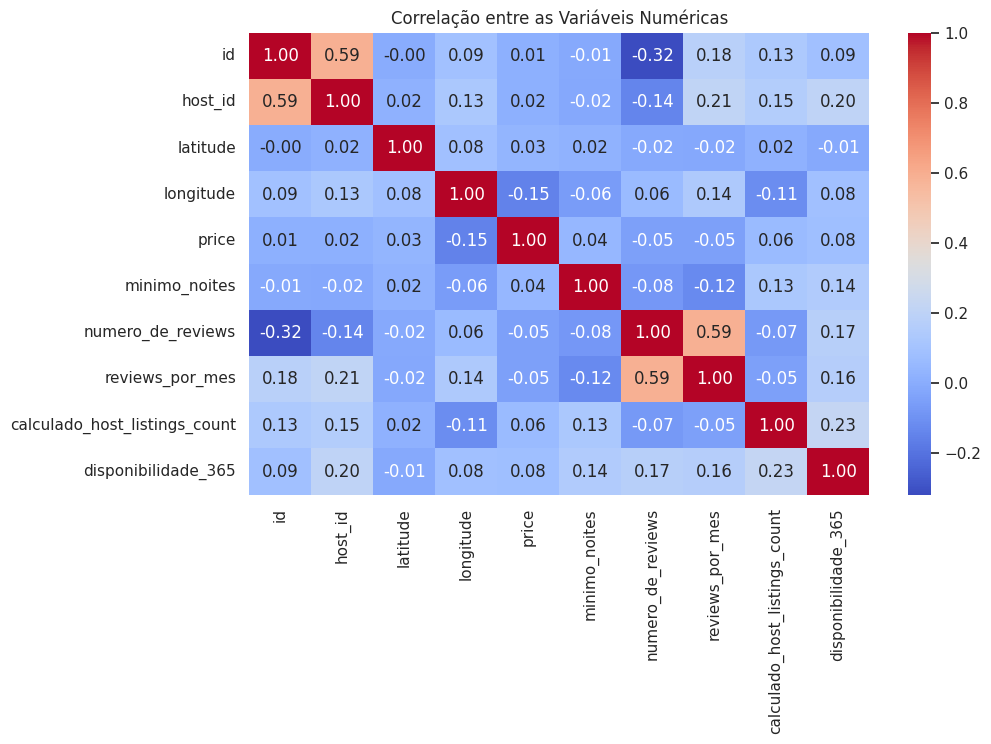

In [ ]:
import numpy as np


df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlação entre as Variáveis Numéricas")
plt.show()


<ipython-input-54-2ad5af9666a5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_invest_bairros, x='mean', y='bairro', palette='viridis')


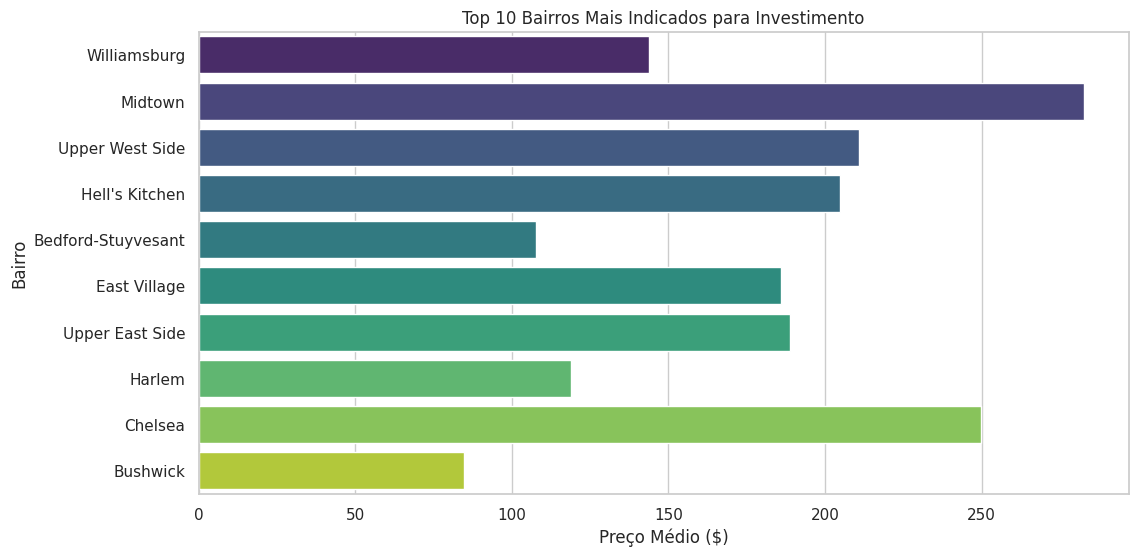

In [ ]:

bairro_stats = df.groupby('bairro')['price'].agg(['mean', 'count']).reset_index()

bairro_stats = bairro_stats[bairro_stats['count'] >= 100]

bairro_stats['invest_score'] = bairro_stats['mean'] * bairro_stats['count']

top_invest_bairros = bairro_stats.nlargest(10, 'invest_score')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_invest_bairros, x='mean', y='bairro', palette='viridis')

plt.xlabel("Preço Médio ($)")
plt.ylabel("Bairro")
plt.title("Top 10 Bairros Mais Indicados para Investimento")


plt.show()


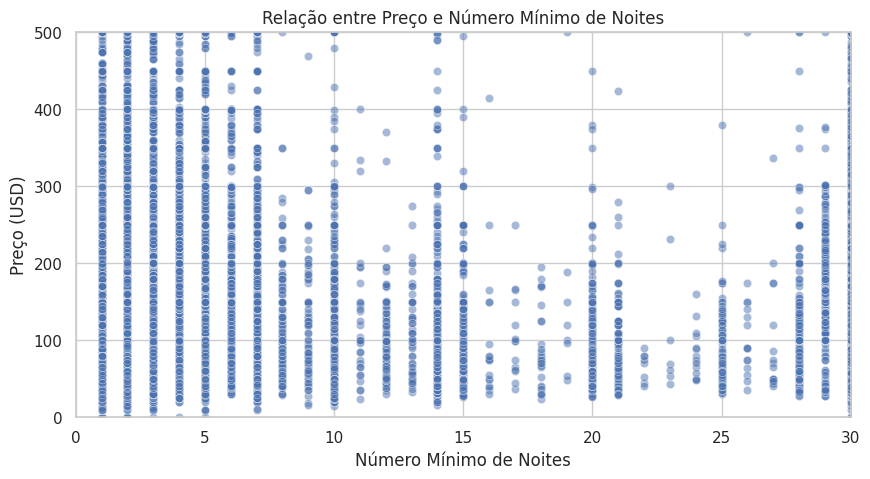

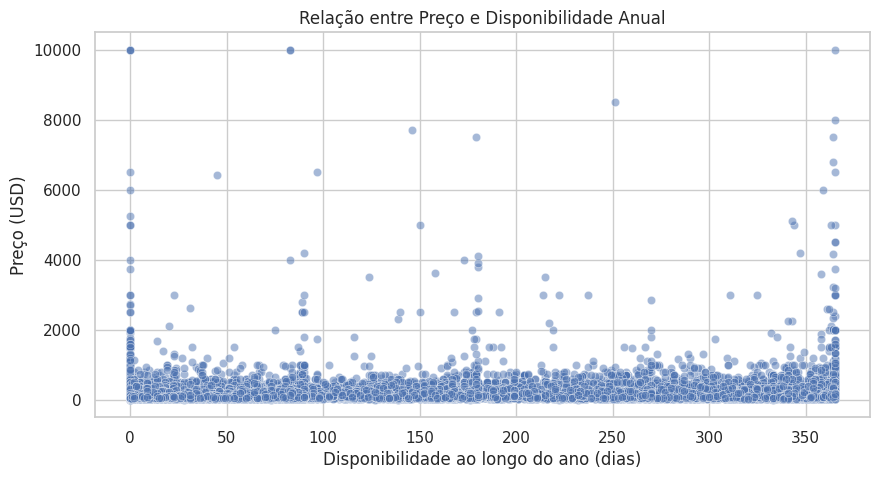

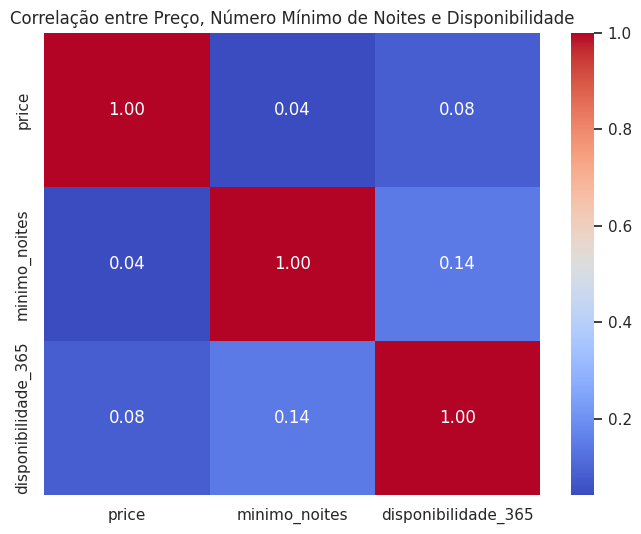

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["minimo_noites"], y=df["price"], alpha=0.5)
plt.xlim(0, 30)
plt.ylim(0, 500)
plt.xlabel("Número Mínimo de Noites")
plt.ylabel("Preço (USD)")
plt.title("Relação entre Preço e Número Mínimo de Noites")
plt.show()


plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["disponibilidade_365"], y=df["price"], alpha=0.5)
plt.xlabel("Disponibilidade ao longo do ano (dias)")
plt.ylabel("Preço (USD)")
plt.title("Relação entre Preço e Disponibilidade Anual")
plt.show()


plt.figure(figsize=(8,6))
sns.heatmap(df[["price", "minimo_noites", "disponibilidade_365"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Preço, Número Mínimo de Noites e Disponibilidade")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


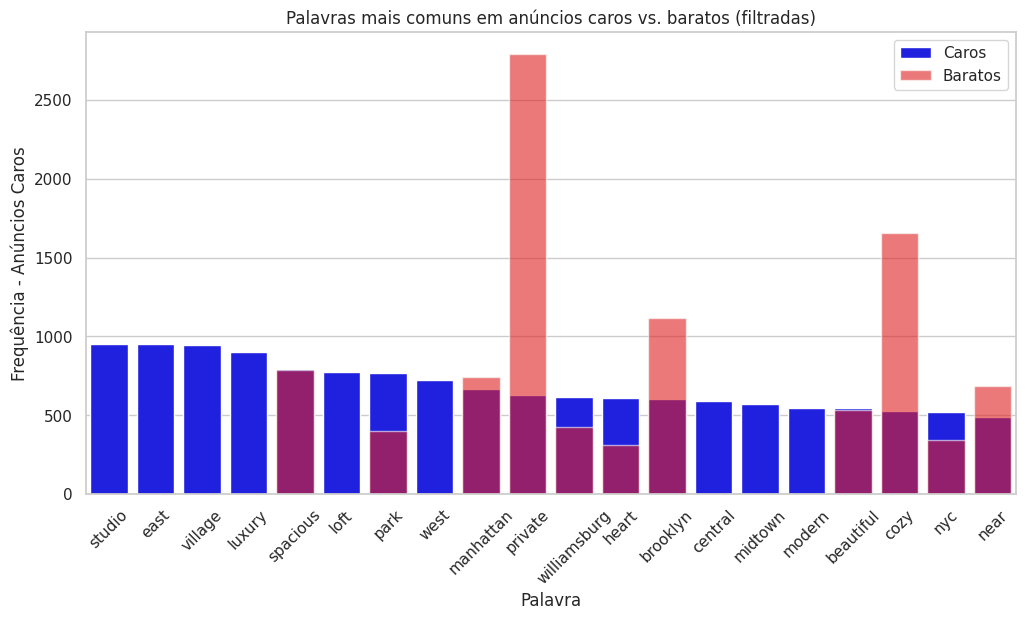

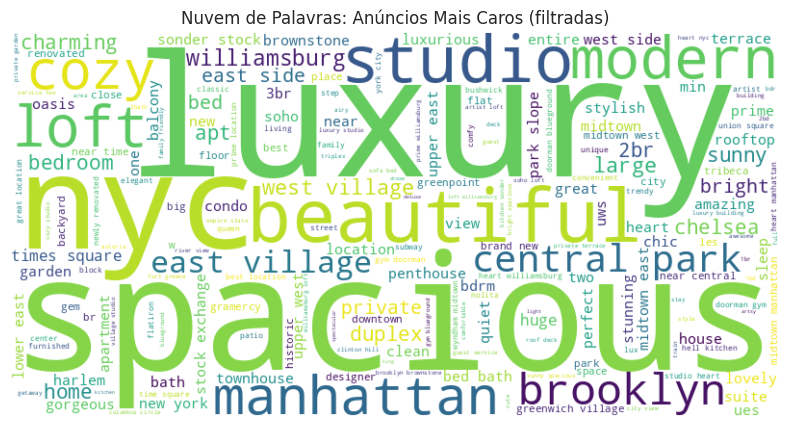

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')


stopwords_personalizadas = set(stopwords.words("english") + stopwords.words("portuguese") +
                               ["bedroom", "apt", "apartment", "quarto", "casa", "room", "in", "the", "with", "2", "1", "of", "i", "1br"])


def contar_palavras(df, coluna="nome"):
    palavras = " ".join(df[coluna].dropna()).lower().split()
    palavras_filtradas = [p for p in palavras if p not in stopwords_personalizadas and len(p) > 2]
    contagem = Counter(palavras_filtradas)
    return contagem.most_common(20)

top_listings = df[df["price"] > df["price"].quantile(0.75)]
cheap_listings = df[df["price"] < df["price"].quantile(0.25)]


top_words = contar_palavras(top_listings)
cheap_words = contar_palavras(cheap_listings)


palavras_df = pd.DataFrame(top_words, columns=["Palavra", "Frequência - Anúncios Caros"])
palavras_df["Frequência - Anúncios Baratos"] = [dict(cheap_words).get(p, 0) for p in palavras_df["Palavra"]]


plt.figure(figsize=(12, 6))
sns.barplot(x="Palavra", y="Frequência - Anúncios Caros", data=palavras_df, color="blue", label="Caros")
sns.barplot(x="Palavra", y="Frequência - Anúncios Baratos", data=palavras_df, color="red", alpha=0.6, label="Baratos")
plt.xticks(rotation=45)
plt.legend()
plt.title("Palavras mais comuns em anúncios caros vs. baratos (filtradas)")
plt.show()


top_text = " ".join([p for nome in top_listings["nome"].dropna()
                     for p in nome.lower().split()
                     if p not in stopwords_personalizadas and len(p) > 2])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(top_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras: Anúncios Mais Caros (filtradas)")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np


df = pd.read_csv("/content/teste_indicium_precificacao.csv")


colunas_remover = ['id', 'nome', 'host_id', 'host_name', 'ultima_review']
df = df.drop(columns=colunas_remover)


categoricas = ['bairro', 'bairro_group', 'room_type']
numericas = ['minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
             'calculado_host_listings_count', 'disponibilidade_365', 'latitude', 'longitude']


df[numericas] = df[numericas].fillna(df[numericas].mean())

df[categoricas] = df[categoricas].fillna(df[categoricas].mode().iloc[0])





X = df.drop(columns=['price'])
y = df['price']


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

X_categ_encoded = encoder.fit_transform(X[categoricas])
X_numerico_scaled = scaler.fit_transform(X[numericas])


X_categ_encoded = pd.DataFrame(X_categ_encoded, columns=encoder.get_feature_names_out(categoricas))
X_numerico_scaled = pd.DataFrame(X_numerico_scaled, columns=numericas)


X_final = pd.concat([X_categ_encoded, X_numerico_scaled], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


modelo = LinearRegression()
modelo.fit(X_train, y_train)


def transformar_dados(novo_apartamento):

    df_novo = pd.DataFrame([novo_apartamento])

    df_categ = encoder.transform(df_novo[categoricas])
    df_categ = pd.DataFrame(df_categ, columns=encoder.get_feature_names_out(categoricas))

    df_numerico = scaler.transform(df_novo[numericas])
    df_numerico = pd.DataFrame(df_numerico, columns=numericas)


    df_final = pd.concat([df_categ, df_numerico], axis=1)

    return df_final


novo_apartamento = {
    'bairro': 'Midtown',
    'bairro_group': 'Manhattan',
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355,
    'latitude': 40.75362,
    'longitude': -73.98377
}

novo_apartamento_transformado = transformar_dados(novo_apartamento)


preco_estimado = modelo.predict(novo_apartamento_transformado)



novo_apartamento['preco_estimado'] = round(preco_estimado[0], 2)

df_apartamento = pd.DataFrame([novo_apartamento])

print("\n📌 Informações do Apartamento:")
for chave, valor in novo_apartamento.items():
    print(f"{chave}: {valor}")



📌 Informações do Apartamento:
bairro: Midtown
bairro_group: Manhattan
room_type: Entire home/apt
minimo_noites: 1
numero_de_reviews: 45
reviews_por_mes: 0.38
calculado_host_listings_count: 2
disponibilidade_365: 355
latitude: 40.75362
longitude: -73.98377
preco_estimado: 353.22


In [ ]:
import joblib

joblib.dump(modelo, "modelo1.pkl")


['modelo1.pkl']